# Analysis of the DLR Knowledge Exchange Workshop Series on Software Engineering
The following Jupyter notebook gives an overview about the five different workshops and participants since 2014. First, we show a basic overview about the workshop and the participant data. Then, we identify the two main groups and check their attendance behavior for every workshop. Finally, we consider how many participants attended the next workshop.

## Basic overview
### Workshop data
The following data set contains the basic information about every workshop including its main topic, date, location, and number of participants. In addition, we calculate the total number of workshop series participants and the average number of participants.

In [1]:
import pandas as pd

workshops = pd.read_csv("data/workshops.csv", index_col="id")
total_num_participants = workshops.num_participants.sum()
average_num_participants = total_num_participants / len(workshops)

print("Total number of participants:", total_num_participants)
print("Average number of participants:", average_num_participants)
workshops.head(5)

Total number of participants: 265
Average number of participants: 53.0


,topic,date,location,num_participants
id,,,,
0,kick-off,November 2014,Braunschweig,57
1,tools and processes,April 2015,Cologne,56
2,open and inner Source,April 2016,Oberpfaffenhofen,53
3,software architecture,April 2017,Berlin,52
4,embedded systems,May 2018,Bremen,47


### Participant data
The participant data has been pre-processed as follows:
- The basis formed the registration lists which have been further cleaned up by removing duplicates and double-checking them with the available attendance lists.
- The data has been anonymized by removing the participants names.
- Specific helper fields have been calculated to support the later analysis.

The resulting data set only contains the unique participants of the workshop series. I.e., every entry represents an unique particpant and indicates the total number of workshops visited, the specific workshops visisted, if the participant still works for the DLR and whether we consider the particpant a non-regular visitor. The last field (non-regular) indicates whether the participant visited more than one workshop but skipped more than one workshop in a row while still working at DLR. The field is later used to differentiate the core participant group.

In [2]:
participants = pd.read_csv("data/participants.csv", index_col="id")
total_unique_participants = len(participants)

print("Total number of unique participants:", total_unique_participants)
participants.head(10)

Total number of unique participants: 189


,num_workshops_visited,1,2,3,4,5,currently_works_for_DLR,non_regular
id,,,,,,,,
0,5,True,True,True,True,True,True,False
1,5,True,True,True,True,True,True,False
2,5,True,True,True,True,True,True,False
3,5,True,True,True,True,True,True,False
4,5,True,True,True,True,True,True,False
5,5,True,True,True,True,True,True,False
6,4,False,True,True,True,True,True,False
7,4,True,True,True,False,True,True,False
8,4,True,True,True,True,False,False,False


### Location Data
The location data for each workshop lists for each particpant it's location of origin as well as if this was the only workshop he or she attended. The data has been anonymized by removing the participants names. The id's used are not related to each other or the id's of the participant data set.

In [26]:
locations_ws1 = pd.read_csv("data/ws1_location.csv", index_col="id")
locations_ws2 = pd.read_csv("data/ws2_location.csv", index_col="id")
locations_ws3 = pd.read_csv("data/ws3_location.csv", index_col="id")
locations_ws4 = pd.read_csv("data/ws4_location.csv", index_col="id")
locations_ws5 = pd.read_csv("data/ws5_location.csv", index_col="id")

locations = pd.concat([locations_ws1, locations_ws2, locations_ws3, locations_ws4, locations_ws5], ignore_index=True)

# Amount of unique locations from which people attended
unique_locations = locations["location"].drop_duplicates().count()
print ("Unique locations from which people attended the workshop series:", unique_locations)
locations.head(10)

Unique locations from which people attended the workshop series: 16


,location,one_time_participant
0,GO,False
1,OP,False
2,BS,False
3,BA,False
4,BS,True
5,BA,False
6,OP,True
7,BA,False
8,BS,True
9,BS,False


## Analysis of the attendance behavior

### Definition of the core group
We consider participants that continually attend the workshops as part of the core group. We include participants into this group, if:
- they attended more than one workshop and
- did not skip more than one workshop in a row while still working at DLR.

In [3]:
participants_more_one_workshop = participants[participants.num_workshops_visited > 1]
num_participants_more_one_workshop = len(participants_more_one_workshop)
core_group = participants_more_one_workshop[participants_more_one_workshop.non_regular == False] # See definition of non_regular
num_core_group = len(core_group)

print("Number of participants visiting more than one workshop:", num_participants_more_one_workshop)
print("Number of core group members:", num_core_group)
print("Number of non-regular visitors:", num_participants_more_one_workshop - num_core_group)

Number of participants visiting more than one workshop: 40
Number of core group members: 30
Number of non-regular visitors: 10


### Definition of the group of one-time participants
One-time participants are participants attending only one workshop.

In [4]:
one_time_participants = participants[participants.num_workshops_visited == 1]
num_one_time_participants = len(one_time_participants)

print("Number of one-time participants:", num_one_time_participants)

Number of one-time participants: 149


### Trend of the attendance rates of the two main groups
In the following, we calculate for every group the attendance rate for every workshop. I.e., we want to find out how many core group members and how many one-time participants attended every workshop. 

In [5]:
# Define attendance data and calculates corresponding attendance rates
attendance_data = {
    "workshop": [1, 2, 3, 4, 5],
    "num_participants": workshops.num_participants.values,
    "num_core_group": [
        core_group["1"].sum(),
        core_group["2"].sum(),
        core_group["3"].sum(),
        core_group["4"].sum(),
        core_group["5"].sum()],
    "num_one_time_participants": [
        one_time_participants["1"].sum(),
        one_time_participants["2"].sum(),
        one_time_participants["3"].sum(),
        one_time_participants["4"].sum(),
        one_time_participants["5"].sum()]
}
attendance_data = pd.DataFrame(attendance_data)
attendance_data["rate_core_to_num_participants"] = attendance_data["num_core_group"] / attendance_data["num_participants"] * 100
attendance_data["rate_one_time_to_num_participants"] = attendance_data["num_one_time_participants"] / attendance_data["num_participants"] * 100
attendance_data = attendance_data.set_index("workshop")

# Calculate the average attendance rate for every group
average_attendance_rate_core = attendance_data["rate_core_to_num_participants"].sum() / len(workshops)
average_attendance_rate_one_time = attendance_data["rate_one_time_to_num_participants"].sum() / len(workshops)

print("Average attendance rate of the core group:", average_attendance_rate_core)
print("Average attendance rate of one-time participants:", average_attendance_rate_one_time)
attendance_data.head(5)

Average attendance rate of the core group: 35.62179930262924
Average attendance rate of one-time participants: 56.35354250431688


,num_core_group,num_one_time_participants,num_participants,rate_core_to_num_participants,rate_one_time_to_num_participants
workshop,,,,,
1,16,33,57,28.070175,57.894737
2,18,30,56,32.142857,53.571429
3,21,28,53,39.622642,52.830189
4,23,29,52,44.230769,55.769231
5,16,29,47,34.042553,61.702128


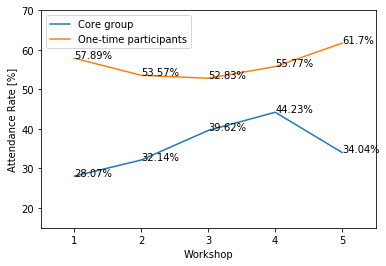

In [6]:
# Plot rates trend
%matplotlib inline
attendance_rate_data = attendance_data.drop(columns=["num_core_group", "num_one_time_participants", "num_participants"])
ax = attendance_rate_data.plot.line()

# Adjust x and y axis as well as the legend
ax.set_xbound(0.5, 5.5)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel("Workshop")
ax.set_ybound(15, 70)
ax.set_ylabel("Attendance Rate [%]")
ax.legend(["Core group", "One-time participants"], loc="upper left")

# Print values
for index, value in enumerate(attendance_rate_data["rate_core_to_num_participants"]):
    ax.text(index + 1, value, str(round(value, 2)) + "%")
for index, value in enumerate(attendance_rate_data["rate_one_time_to_num_participants"]):
    ax.text(index + 1, value, str(round(value, 2)) + "%")

### How many participants attended the next workshop as well?

In [7]:
# Define the attended next data
attended_next_data = {
    "workshop": [1, 2, 3, 4],
    "num_attended_next": [
        len(participants[(participants["1"] == True) & (participants["2"] == True)]),
        len(participants[(participants["2"] == True) & (participants["3"] == True)]),
        len(participants[(participants["3"] == True) & (participants["4"] == True)]),
        len(participants[(participants["4"] == True) & (participants["5"] == True)]),
    ],
    "num_participants": workshops.num_participants.values[:-1]
}
attended_next_data = pd.DataFrame(attended_next_data)
attended_next_data["attended_next_rate"] = attended_next_data["num_attended_next"] / attended_next_data["num_participants"] * 100
attended_next_data = attended_next_data.set_index("workshop")

attended_next_data.head(5)

,num_attended_next,num_participants,attended_next_rate
workshop,,,
1,20,57,35.087719
2,15,56,26.785714
3,16,53,30.188679
4,13,52,25.000000


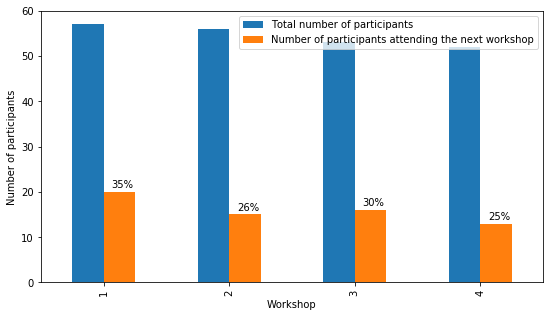

In [8]:
# Plot the attended next data
attended_next_plot = attended_next_data.drop(columns=["attended_next_rate"])
attended_next_plot = attended_next_plot[["num_participants", "num_attended_next"]] # Ensure the right column order
ax = attended_next_plot.plot.bar(figsize=(9, 5))
ax.set_xlabel("Workshop")
ax.set_ylabel("Number of participants")
ax.set_ybound(0, 60)
ax.legend(["Total number of participants", "Number of participants attending the next workshop"])

# Print attended next rate values
num_pairs = 4
attended_next_rates = ["{}%".format(int(value)) for value in attended_next_data.attended_next_rate.values]
make_pairs = zip(*[ax.get_children()[:num_pairs], ax.get_children()[num_pairs:num_pairs*2]])
for index, (left, right) in enumerate(make_pairs):
    ax.text(index + 0.15, min(left.get_bbox().y1, right.get_bbox().y1) + 1, attended_next_rates[index], horizontalalignment="center")

## Analysis of the attendance origin location
In the following we analyse the origin locations of the workshop participants and how it influences their attendance.

### Where do the participants of the workshop series origin from?

In [31]:
# Count the amount of participants of the workshop series per location
location_distribution = locations.location.value_counts()

location_distribution_filt = location_distribution[location_distribution > 5]

OP    73
BS    71
BA    35
KP    22
ST    13
GO    12
HB    10
BO     7
Name: location, dtype: int64

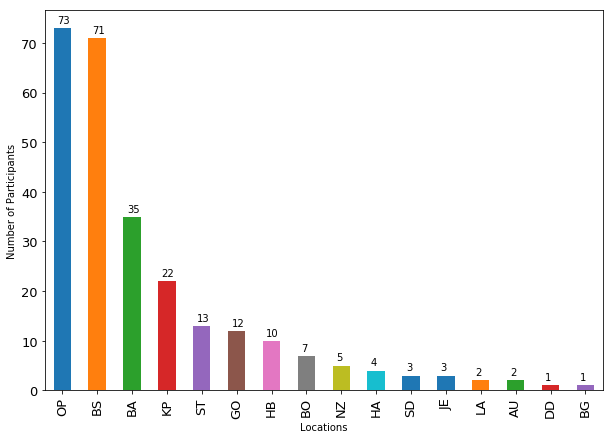

In [28]:
# Plot the locatio dictribution data
ax = location_distribution.plot(kind='bar', figsize=(10,7),
                                        fontsize=13);
ax.set_xlabel("Locations")
ax.set_ylabel("Number of Participants");

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+1, \
            str(i.get_height()))

### Do more people attend a workshop if it is run at their location?

In [27]:
# From which locations are the participants for each workshop?
location_distribution_per_ws = pd.DataFrame({"WS 1: Braunschweig (BS)": locations_ws1.location.value_counts(),
                                       "WS 2: Cologne (KP)": locations_ws2.location.value_counts(),
                                       "WS 3: Oberpfaffenhofen (OP)": locations_ws3.location.value_counts(),
                                       "WS 4: Berlin (BA)": locations_ws4.location.value_counts(),
                                       "WS 5: Bremen (HB)": locations_ws5.location.value_counts()})

# Filter chart down to locations where a workshop took place
location_distribution_per_ws_filtered = location_distribution_per_ws.loc[['BS', 'KP', 'OP', 'BA', 'HB']]

location_distribution_per_ws_filtered.head()

,WS 1: Braunschweig (BS),WS 2: Cologne (KP),WS 3: Oberpfaffenhofen (OP),WS 4: Berlin (BA),WS 5: Bremen (HB)
BS,27.0,14.0,6.0,13.0,11.0
KP,2.0,17.0,NaN,1.0,2.0
OP,10.0,8.0,34.0,12.0,9.0
BA,4.0,8.0,4.0,16.0,3.0
HB,NaN,1.0,1.0,1.0,7.0


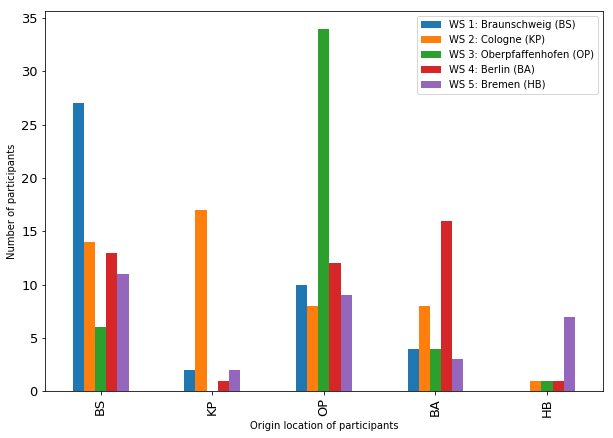

In [24]:
ax = location_distribution_per_ws_filtered.plot(kind='bar', figsize=(10,7),
                                        fontsize=13)
ax.set_xlabel("Origin location of participants")
ax.set_ylabel("Number of participants");

In [13]:
# Calculate factor of which the number of participants increase when the workshop is run in that location in comparison to external workshops

def calc_factor(location):
    local_ws = location_distribution_per_ws.loc[location].max() # Max can be used since all local workshops were visited by the most participants in comparison to external workshops
    external_ws = location_distribution_per_ws.loc[location].sum() - local_ws
    external_ws_avg = (external_ws / 4)
    diff = local_ws - external_ws_avg
    factor = local_ws / external_ws_avg
    print ("The local workshop in", location, "was visited by", diff, "more participants from", location, "than an average external one.")
    print ("The local workshop in", location, "was visited by", factor, "times more participants from", location, "than an average external one.")
    
calc_factor('BS')
calc_factor('KP')
calc_factor('OP')
calc_factor('BA')
calc_factor('HB')

The local workshop in BS was visited by 16.0 more participants from BS than an average external one.
The local workshop in BS was visited by 2.4545454545454546 times more participants from BS than an average external one.
The local workshop in KP was visited by 15.75 more participants from KP than an average external one.
The local workshop in KP was visited by 13.6 times more participants from KP than an average external one.
The local workshop in OP was visited by 24.25 more participants from OP than an average external one.
The local workshop in OP was visited by 3.4871794871794872 times more participants from OP than an average external one.
The local workshop in BA was visited by 11.25 more participants from BA than an average external one.
The local workshop in BA was visited by 3.3684210526315788 times more participants from BA than an average external one.
The local workshop in HB was visited by 6.25 more participants from HB than an average external one.
The local workshop in 